## Boron Atom - Basis Sets

In [1]:
#import required modules
import numpy as np
import psi4 

***

### Part. A, What is the calculated Hartree Fock energy using a minimal basis set?

In [15]:
#Define our a Boron atom as a psi4.geometry object. 
boron = psi4.geometry("""
0 2

B

""")

In [17]:
#Make sure that Psi4 performs an *Unrestricted* calculation
psi4.set_options({'reference' : "UHF"})

#Select basis set and method, and perform single-point calculation.
B_energy, wfn = psi4.energy("HF/STO-3G", molecule=boron, return_wfn=True)
#The wfn object was useful information about our calculation. So we should save it!

In [18]:
#Print the result from the calculation
print("\n")


print(F"Results for STO-3G \n")

#Energy
print(F"Energy: {B_energy} \n")

#Basis functions
print(F"# of Basis Functions: {wfn.basisset().nbf()}")

#Since we will be doing many calculations, let us make a dictionary where we can store them.
energies = {}
energies.update({"STO-3G":B_energy})



Results for STO-3G 

Energy: -24.149116604634685 

# of Basis Functions: 5


___

### Part B. How does the Hartree Fock energy depend on the trial basis set?

STO-3G, where STO stands for Slater-type orbitals (STO) which is approximated by the sum of 3 smooth Gaussian functions as:

$$\phi^{STO-3G} = \sum_i^3 d_i \cdot C(\alpha_i) \cdot e^{-\alpha_i|r-R_A|^2}  $$

Where the $\{ \alpha \}_i$ and $\{ d \}_i$ are the exponents and coefficients that define a basis set and are usually the components needed to create a basis set file. 

The STO is a sharp-peaked function that may be too expensive to compute computationally! As a response we use smooth gaussian functions, to approximate the STO. The number of gaussians per orbital is commonly known as primitives. 

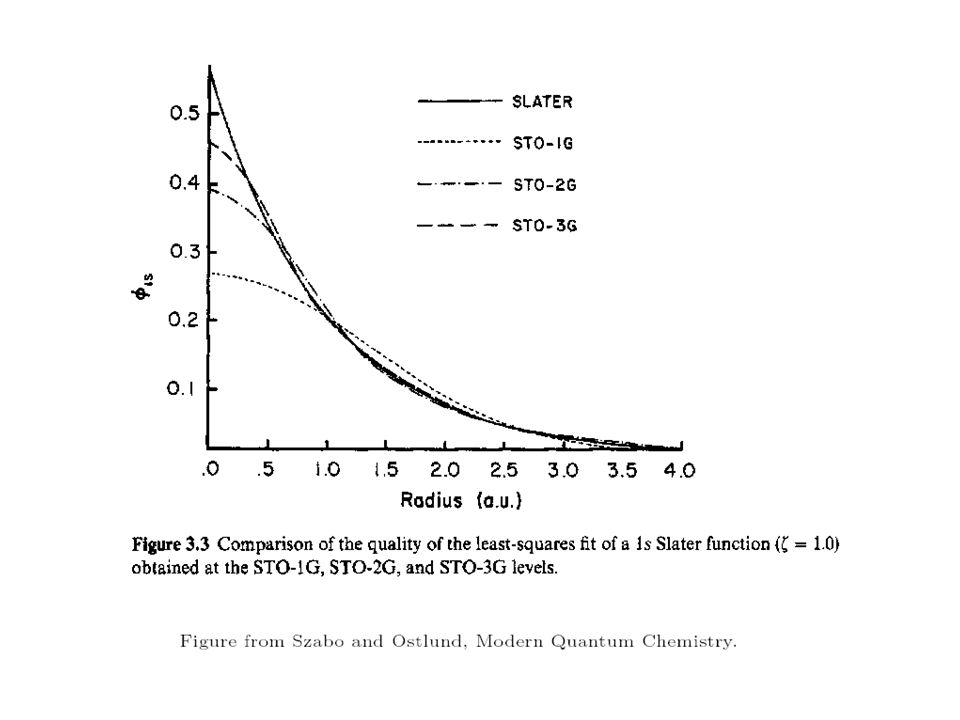

In [19]:
#Let us now use the 3-21G, and print and store the information as before
B_energy, wfn = psi4.energy("HF/3-21G", molecule=boron, return_wfn=True)

print(F"Results for 3-21G \n")

#Energy
print(F"Energy: {B_energy} \n")

#Basis functions
print(F"# of Basis Functions: {wfn.basisset().nbf()}")

#Store in our dictionary
energies.update({"3-21G":B_energy})

Results for 3-21G 

Energy: -24.389773074287618 

# of Basis Functions: 9


In [6]:
#Let us look at the energies
print(energies)

{'STO-3G': -24.149116604634685, '3-21G': -24.389773074287618}


Remember that the variational principle gives us a lower bound for the energy, thus the more accurate the result, the more negative. This is consistent with our calculation with a more complete basis set.  


STO-3G Is a minimal basis set, this means that each shell is represented by a single function. Thus since Boron has 5 electrons and we are doing an unrestricted calculation. We have 5 basis functions, each of them represented by 3 gaussians. 

3-21G on the other hand has 3 Gaussians for the inner shell electrons (Lower energy 2 electrons).  
The rest of the orbitals (3) are then computed each by two STO with 2 and 1 Gaussian respectively. In total, we represent the occupied orbitals with 9 basis functions.


***

### Part C. How can we improve the accuracy of the HF energy?

#### Polarization:
This is the unequal distribution of electrons in an atom. This can be done with a basis function of a higher orbital angular momentum.

In basis set notation:

* One asterisk (*) refers to polarization on heavy atoms.

* Two asterkisks (**) is used for polarization on Hydrogen (H-Bonding).


#### Difusse Functions:
These are useful for systems in an excited state, systems with low ionization potential, and systems with some significant negative charge attached. 

In basis set notation:

* One plus sign (+) adds diffuse functions on heavy atoms.
* Two plus signs (++) add diffuse functions on Hydrogen atoms.


In [21]:
#In order to make calculations on different basis sets, let's make a list of all the basis sets we need:
basis_list = ['6-31G', '6-31+G', '6-31G*', '6-31+G*', '6-311G*', '6-311+G**', 'cc-pVDZ', 'cc-pVTZ']

#Make a dictionary to store the number of basis functions too
nbf = {}
energies = {}

In [22]:
#And perform a loop that will make the calculations:

    
for basis in basis_list:
    met_bas = "HF/**basis**"
    B_energy, wfn = B_energy, wfn = psi4.energy(met_bas.replace("**basis**", basis), molecule=boron, return_wfn=True)
    energies.update({basis: B_energy})
    nbf.update({basis: wfn.basisset().nbf()})

In [23]:
#Pandas is a module that can nicely deal with large data sets
import pandas as pd

#Build the data set with our dictionaries
basis_dataset = pd.DataFrame(data=[energies, nbf], index=["Energy", "nbf"])
basis_dataset.T

,Energy,nbf
6-31+G,-24.523727,13.0
6-31+G*,-24.526158,19.0
6-311+G**,-24.530345,22.0
6-311G*,-24.530099,18.0
6-31G,-24.519491,9.0
6-31G*,-24.522035,15.0
cc-pVDZ,-24.529958,14.0
cc-pVTZ,-24.532065,30.0


In [24]:
#Pandas allows us to order the dataframe, so for example if we are looking for the most negative energy:

basis_dataset.T.sort_values("Energy")

,Energy,nbf
cc-pVTZ,-24.532065,30.0
6-311+G**,-24.530345,22.0
6-311G*,-24.530099,18.0
cc-pVDZ,-24.529958,14.0
6-31+G*,-24.526158,19.0
6-31+G,-24.523727,13.0
6-31G*,-24.522035,15.0
6-31G,-24.519491,9.0


Here we can appreciate how as we increase the number of basis functions, we have a more negative, and thus, more ccurate result. 

***

### Part D. How much "correlation energy" can we recover

In [40]:
#Experimental energy of Boron
B_exact_e = -24.608
#B_exact_e = -24.639194 
#B_exact_e = -24.654 


#Difference betwee 6-311+G** 
correlation = B_exact_e - energies["6-311+G**"]

print(F"\n Electron correlation: {correlation} hartrees")


 Electron correlation: -0.0776548272231743 hartrees


In [28]:
#### Calculation using Møller–Plesset perturbation theory (MPN)


psi4.set_options({"reference" :"uhf"})
#MP2
e_mp2 = psi4.energy("MP2/6-311+G**", molecule=boron)
#CCSD
e_ccsd = psi4.energy("CCSD/6-311+G**", molecule=boron)
#CCSD(T)
e_ccsd_t = psi4.energy("CCSD(T)/6-311+G**", molecule=boron)


#MP4 (finicky :))
psi4.set_options({"reference" :"rohf", 
                   "qc_module":"detci"})

e_mp4 = psi4.energy("mp4/6-311+G**", molecule=boron)

psi4.core.clean_options()

In [41]:
#Analize the percentage of correlation recovered

mp2_cor    = (e_mp2-energies["6-311+G**"])/correlation * 100
mp4_cor    = (e_mp4-energies["6-311+G**"])/correlation * 100
ccsd_cor   = (e_ccsd-energies["6-311+G**"])/correlation * 100
ccsd_t_cor = (e_ccsd_t-energies["6-311+G**"])/correlation * 100

print("\n Percentages of Correlation: \n")
print(F"MP2: {mp2_cor}")
print(F"MP4: {mp4_cor}")
print(F"CCSD: {ccsd_cor}")
print(F"CCSD(T): {ccsd_t_cor}")


 Percentages of Correlation: 

MP2: 72.04240142111871
MP4: 98.54006108475535
CCSD: 100.7113784447006
CCSD(T): 102.15018244933214


***

### Part E. Can we use DFT(B3LYP) to calculate the electron affinity of boron?

The electron affinity for an atom A is defined by the process:

$$ A + e^{-} \rightarrow A^{-} $$

And can be calculated as 

$$ EA = - (E_{anion} - E{neutral}) $$

It was reported that for boron:

EA(B3LYP/6-311+G**) = -0.36 ev

EA(Experimental)    = 0.28 ev

Was this calculation correct?

In [24]:
#Define Anion
boron_triplet = psi4.geometry("""
-1 3

B
""")

#Compute the energies

psi4.set_options({"reference": "UHF"})

neutral = psi4.energy("B3LYP/6-311+G**", molecule=boron)
anion_triplet   = psi4.energy("B3LYP/6-311+G**", molecule=boron_triplet)



In [25]:
EA = -1 * (anion_triplet - neutral)

print("\n Triplet: ")
print(F"\n Electron affinity (B3LYP): {EA} au")
print(F"\n Electron affinity (B3LYP): {EA * 27.2116 } hartree")


 Triplet: 

 Electron affinity (B3LYP): 0.0148934787225663 au

 Electron affinity (B3LYP): 0.4052753856069851 hartree


In [28]:
#Calculation for the singlet
boron_singlet = psi4.geometry("""
-1 1

B
""")

anion_singlet = psi4.energy("B3LYP/6-311+G**", molecule=boron_singlet)


EA = -1 * (anion_singlet - neutral)

print("\n Triplet: ")
print(F"\n Electron affinity (B3LYP): {EA} au")
print(F"\n Electron affinity (B3LYP): {EA * 27.2116 } hartree")


 Triplet: 

 Electron affinity (B3LYP): -0.013069739998968544 au

 Electron affinity (B3LYP): -0.3556485369559324 hartree


The calculation was using a singlet state, which would be inconsistent with Hund's rules. The person doing the calculation must select the correct spin multiplicity. 